In [1]:
# Some standard imports for math and data handling
import sys
import numpy as np
np.set_printoptions(threshold=sys.maxsize)
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import pickle

# Imports for processing specific to this workbook
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
from sklearn import preprocessing
from datetime import datetime

# Import the custom code developed for this work
sys.path.append('python')
from clusterOutliers import clusterOutliers as coo
import quarterTools as qt
import kinship as kn
%matplotlib inline

In [2]:
path_to_output = '/Users/Dan/Documents/KeplerLCs/output/'
Q_dict = dict()
with open(path_to_output+'Q1_ref.coo','rb') as file:
    Q_dict['Q1']=pickle.load(file)  # though unnecessary for a single quarter, 
                                    # using a dictionary is more consistent with
                                    # code elsewhere, requires less rewrite

In [3]:
fts_minus_rats = ['longtermtrend', 'meanmedrat', 'skews', 'varss', 'coeffvar', 'stds',
       'numoutliers', 'numnegoutliers', 'numposoutliers', 'numout1s', 'kurt',
       'mad', 'maxslope', 'minslope', 'meanpslope', 'meannslope', 'g_asymm',
       'rough_g_asymm', 'diff_asymm', 'skewslope', 'varabsslope', 'varslope',
       'meanabsslope', 'absmeansecder', 'num_pspikes', 'num_nspikes',
       'num_psdspikes', 'num_nsdspikes', 'stdratio', 'pstrend', 'num_zcross',
       'num_pm', 'len_nmax', 'len_nmin', 'mautocorrcoef', 'ptpslopes',
       'periodicity', 'periodicityr', 'naiveperiod', 'maxvars', 'maxvarsr',
       'oeratio', 'amp', 'normamp', 'mbp', 'mid20', 'mid35', 'mid50', 'mid65',
       'mid80', 'percentamp', 'magratio', 'sautocorrcoef', 'autocorrcoef',
       'flatmean', 'tflatmean', 'roundmean', 'troundmean']

In [4]:
starttime = datetime.now()
Q='Q1'
# Use StandardScaler to normalize all features
Q_data_scaled = qt.data_scaler(Q_dict[Q].data.loc[:,fts_minus_rats])
# Score each object by its proximity to its neighbors, use sampling to improve computing time
scores = kn.kinship_scores(data = Q_data_scaled,samp_size=10000,n_iter=10,kmin=1,kmax=2)
columns=['k1_minus_rats','k2_minus_rats','kav12_minus_rats']

# Scale the data by the score of the sinusoid (which must be the final index)
scoresdf = pd.DataFrame(data = scores.T/scores[:,-1], columns=columns,index=Q_data_scaled.index)
# Save scores to the cluster outlier object. 
# Note: Not sure why it's rescaled... probably leftover and redundant. Shouldn't hurt anything
# since the score of the sinusoid should be scaled to 1 by all post-score scaling.
#Q_dict[Q].scores['minus_rats'] = scoresdf
print("Time to score: {}".format(datetime.now()-starttime))

Time to score: 0:04:18.282889


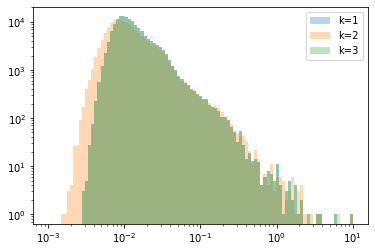

In [14]:
bins=np.logspace(-3,1,100)
plt.hist(scoresdf['k1_minus_rats'],bins=bins,alpha=.3,label='k=1')
plt.hist(scoresdf['k2_minus_rats'],bins=bins,alpha=.3,label='k=2')
plt.hist(scoresdf['kav12_minus_rats'],bins=bins,alpha=.3,label='k=3')
plt.xscale('log')
plt.yscale('log')
plt.legend()

In [4]:
Q='Q1'
scoresdf=pd.DataFrame(index=Q_dict[Q].data.index)
for col in Q_dict[Q].data.columns:
    Q_data_scaled=qt.data_scaler(Q_dict[Q].data.drop(columns=col))
    scores = kn.kinship_scores(data=Q_data_scaled,samp_size=1000,n_iter=10,kmin=1)
    scoresdf['a{}'.format(col)] = scores.T/scores[:,-1]

In [9]:
Q_data_scaled=qt.data_scaler(Q_dict[Q].data)
for i in range(10):
    scores = kn.kinship_scores(data=Q_data_scaled,samp_size=1000,n_iter=10,kmin=1)
    scoresdf['full_{}'.format(i)] = scores.T/scores[:,-1]

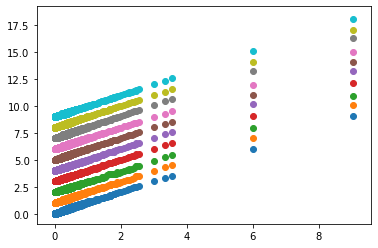

In [13]:
for i in range(10):
    plt.scatter(scoresdf['full'],scoresdf['full_{}'.format(i)]+i)

In [64]:
scoresdf[abs(Q_dict['Q1'].data.roundrat)>=10000]

,alongtermtrend,ameanmedrat,askews,avarss,acoeffvar,astds,anumoutliers,anumnegoutliers,anumposoutliers,anumout1s,...,full_0,full_1,full_2,full_3,full_4,full_5,full_6,full_7,full_8,full_9
kplr004671249-2009166043257_llc.fits,1.657364,1.674031,1.659152,1.711284,1.734552,1.813453,1.670910,1.679428,1.657322,1.698432,...,1.663879,1.671316,1.645907,1.692869,1.690524,1.658793,1.642076,1.710535,1.662357,1.657104
kplr005252698-2009166043257_llc.fits,1.669901,1.693070,1.678724,1.729999,1.753700,1.832618,1.689595,1.697259,1.675762,1.718806,...,1.682047,1.688907,1.664899,1.710791,1.708569,1.677473,1.659075,1.730147,1.682439,1.676277
kplr003448047-2009166043257_llc.fits,0.423669,0.427574,0.423394,0.436435,0.442515,0.462180,0.426968,0.426730,0.423583,0.433735,...,0.422072,0.425831,0.419729,0.433245,0.427963,0.421983,0.419446,0.435247,0.425136,0.423382
kplr006200250-2009166043257_llc.fits,1.677097,1.702944,1.690403,1.741312,1.766089,1.844725,1.699284,1.710058,1.686639,1.729374,...,1.694190,1.701498,1.676064,1.722625,1.722706,1.689258,1.671613,1.742188,1.692860,1.686798
kplr006852771-2009166043257_llc.fits,1.658505,1.675428,1.662129,1.712242,1.735837,1.814555,1.673403,1.680102,1.658818,1.699987,...,1.665509,1.672281,1.647598,1.693500,1.692387,1.659765,1.644232,1.711872,1.663157,1.659928
kplr009881756-2009166043257_llc.fits,0.382344,0.385967,0.381494,0.394119,0.399232,0.416741,0.385352,0.384470,0.382835,0.391180,...,0.380608,0.384210,0.379018,0.391262,0.385640,0.380378,0.378404,0.392389,0.384016,0.382637
kplr008702065-2009166043257_llc.fits,1.660408,1.677821,1.663982,1.716021,1.739138,1.817075,1.673637,1.684183,1.661577,1.702124,...,1.668711,1.675415,1.649932,1.696604,1.697727,1.663751,1.647323,1.715912,1.665579,1.661590
kplr010215443-2009166043257_llc.fits,0.499292,0.503848,0.499241,0.514408,0.521605,0.546118,0.503796,0.504576,0.499319,0.511859,...,0.498802,0.503354,0.495810,0.510316,0.506776,0.498314,0.494356,0.514040,0.500719,0.499345
kplr010483381-2009166043257_llc.fits,1.668540,1.693783,1.678399,1.729466,1.754440,1.832604,1.685963,1.699045,1.674866,1.716765,...,1.683154,1.689495,1.664772,1.711979,1.711720,1.678241,1.660319,1.731197,1.680920,1.675216
kplr010141784-2009166043257_llc.fits,0.293742,0.297729,0.295122,0.304121,0.308888,0.321407,0.296691,0.299132,0.295644,0.302256,...,0.292169,0.297513,0.293510,0.301755,0.301652,0.295783,0.292122,0.304997,0.295933,0.295330


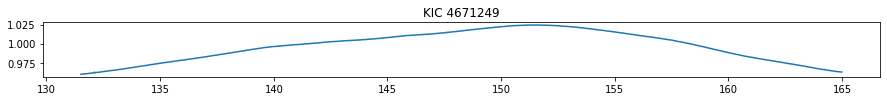

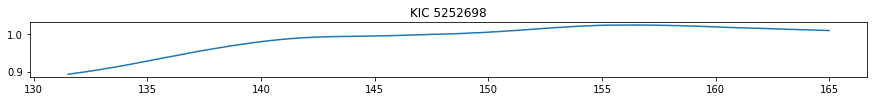

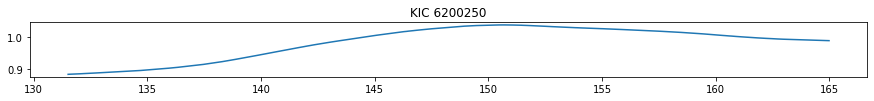

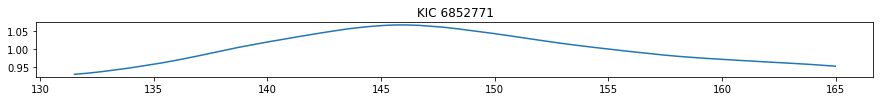

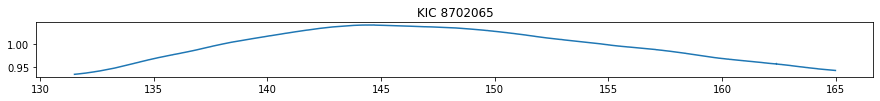

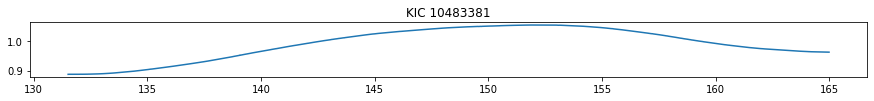

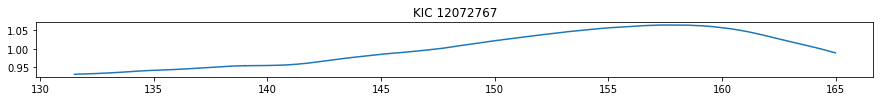

In [73]:
from astroquery.mast import Observations # how to remotely access Kepler data from Mast
import shutil # to delete downloaded fits files once done
tmp = Q_dict['Q1'].data[abs(Q_dict['Q1'].data.roundrat)==123456]
filenames = list(tmp.index)
obj_ids = [i[:13] for i in tmp.index]
keplerObs = Observations.query_criteria(target_name=obj_ids, obs_collection='Kepler')
keplerProds = Observations.get_product_list(keplerObs)
yourProd = Observations.filter_products(keplerProds, extension=filenames)
manifest = Observations.download_products(yourProd)

manifest = manifest.to_pandas(index='Local Path')
    
for i,f in enumerate(filenames): # forcing the order to match most to least outlying
    f_sampler = qt.make_sampler([f]) # to find the right file from manifest
    filename = f_sampler(manifest).index[0] # full local filepath

    fig = plt.figure(figsize=(15,1))
    ax = fig.add_subplot(111)
    t,nf,err = qt.read_kepler_curve(filename)
    ax.errorbar(t,nf,err)
    plt.title('KIC {}'.format(int(obj_ids[i][4:])))

shutil.rmtree('./mastDownload') # removing the downloaded data

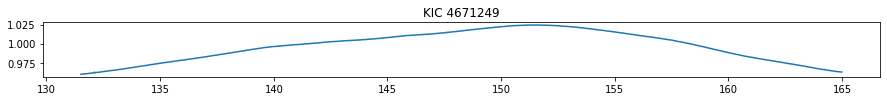

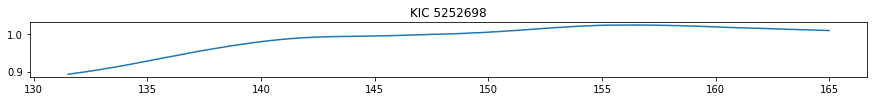

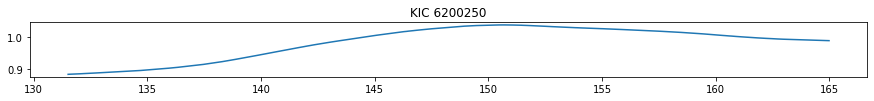

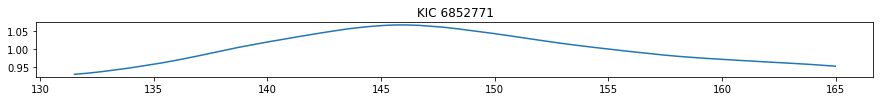

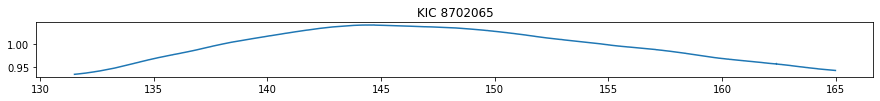

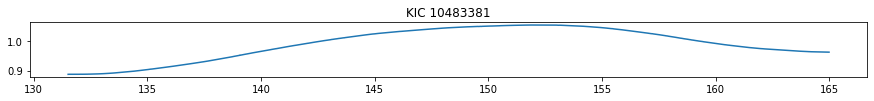

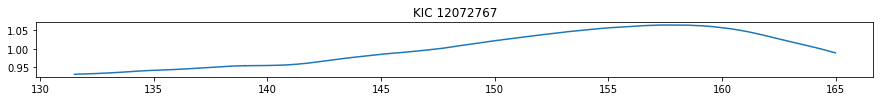

In [77]:
tmp = Q_dict['Q1'].data[abs(Q_dict['Q1'].data.roundrat)==123456]
filenames = list(tmp.index)
obj_ids = [i[:13] for i in tmp.index]
keplerObs = Observations.query_criteria(target_name=obj_ids, obs_collection='Kepler')
keplerProds = Observations.get_product_list(keplerObs)
yourProd = Observations.filter_products(keplerProds, extension=filenames)
manifest = Observations.download_products(yourProd)

manifest = manifest.to_pandas(index='Local Path')
    
for i,f in enumerate(filenames): # forcing the order to match most to least outlying
    f_sampler = qt.make_sampler([f]) # to find the right file from manifest
    filename = f_sampler(manifest).index[0] # full local filepath

    fig = plt.figure(figsize=(15,1))
    ax = fig.add_subplot(111)
    t,nf,err = qt.read_kepler_curve(filename)
    ax.errorbar(t,nf,err)
    plt.title('KIC {}'.format(int(obj_ids[i][4:])))
    plt.savefig('./Plots/PlotsForScoringPaper/KIC{}'.format(int(obj_ids[i][4:])))

shutil.rmtree('./mastDownload') # removing the downloaded data

In [18]:
scoresbyfull = scoresdf.sort_values(by='full',ascending=False).head(10000)

/opt/anaconda3/envs/KeplerFull37/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


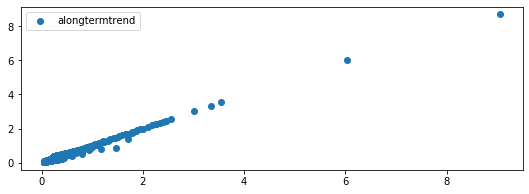

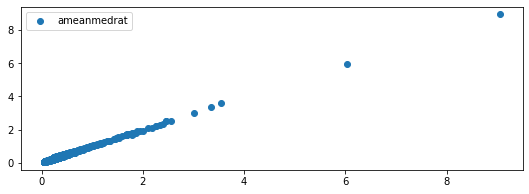

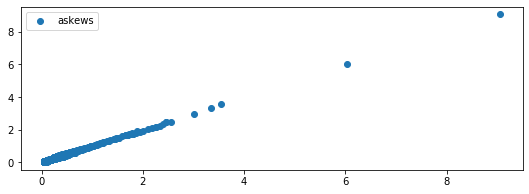

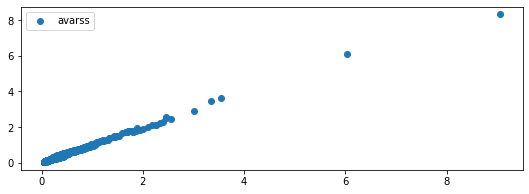

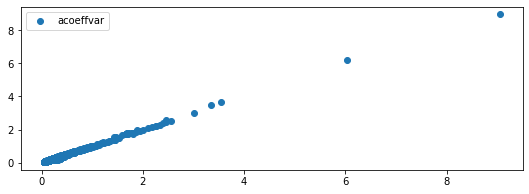

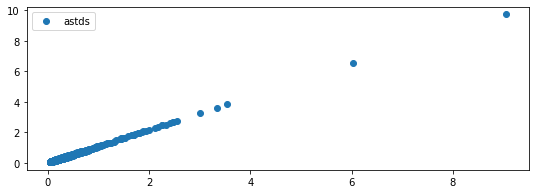

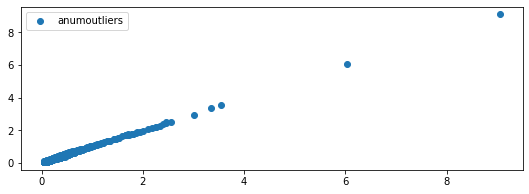

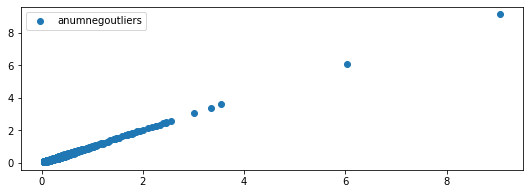

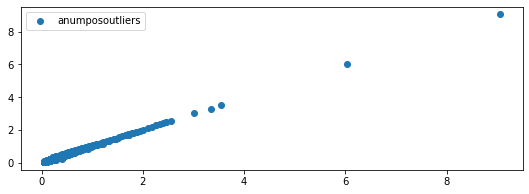

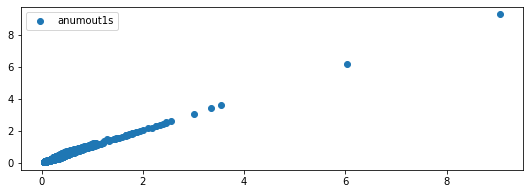

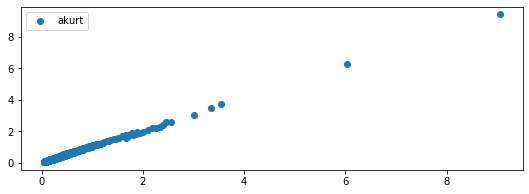

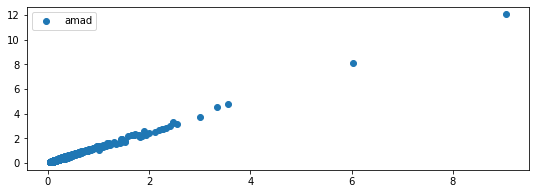

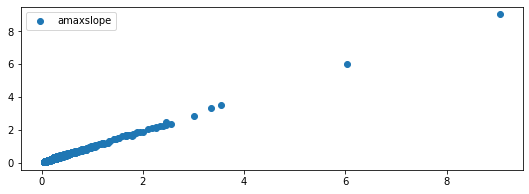

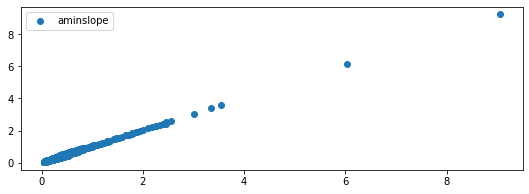

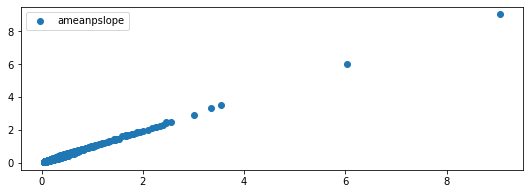

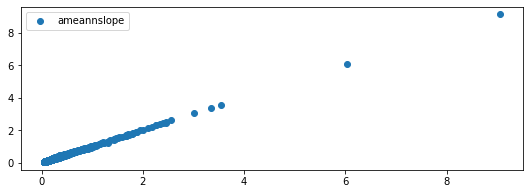

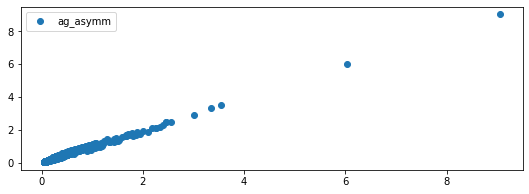

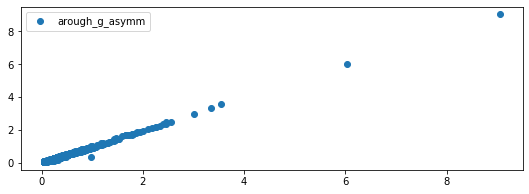

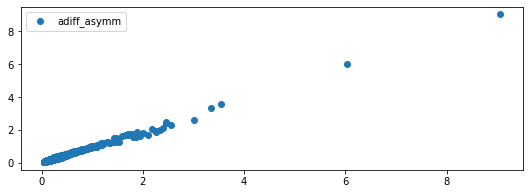

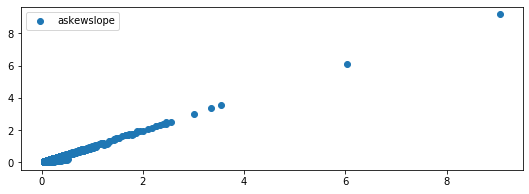

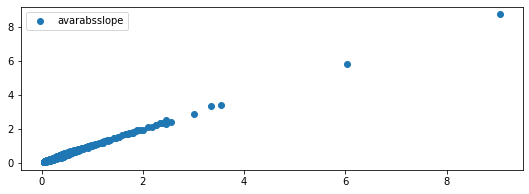

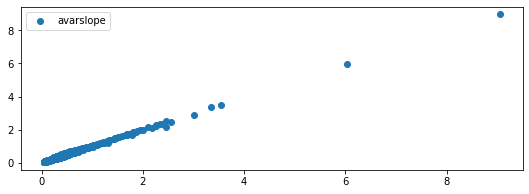

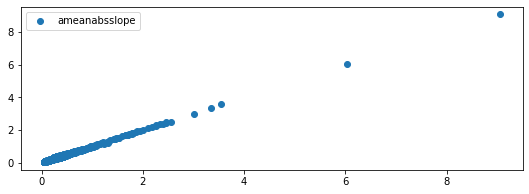

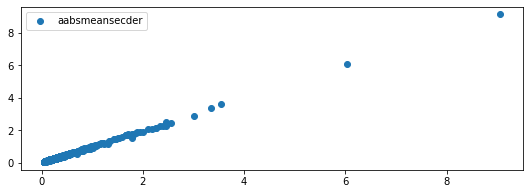

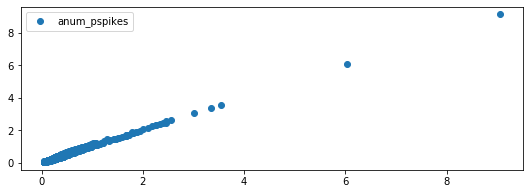

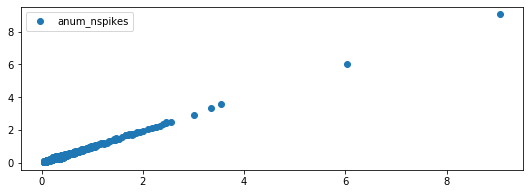

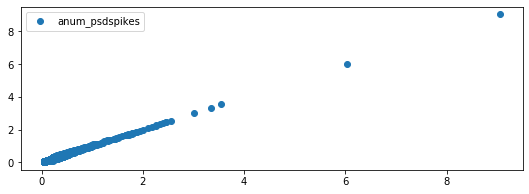

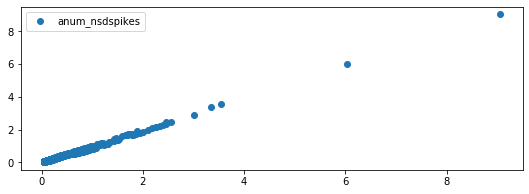

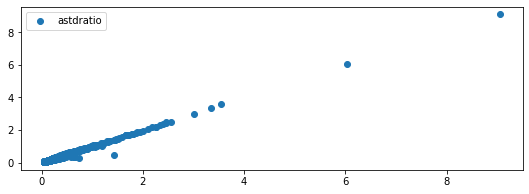

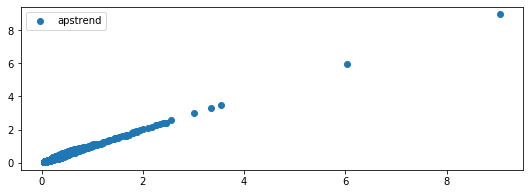

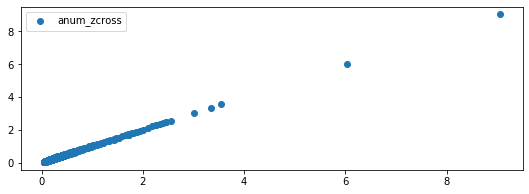

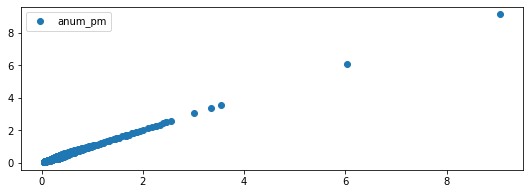

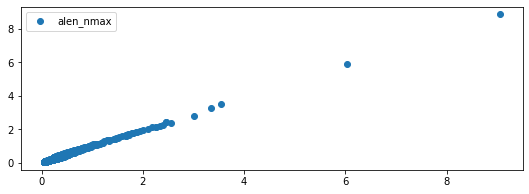

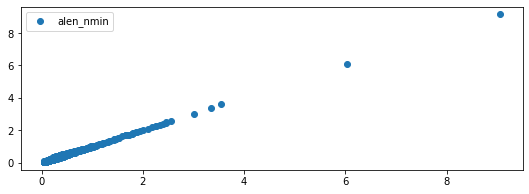

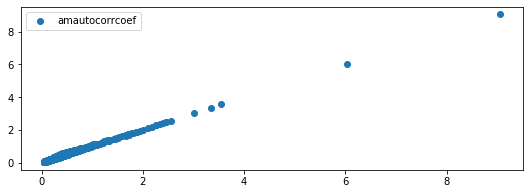

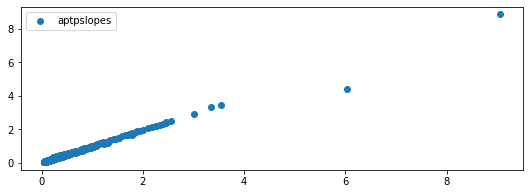

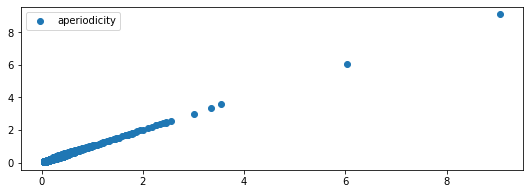

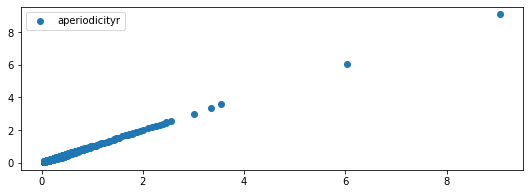

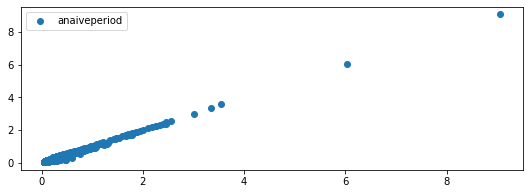

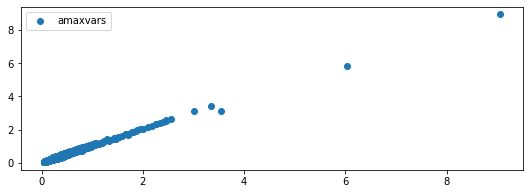

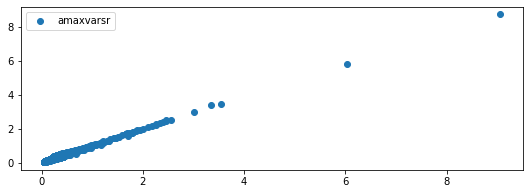

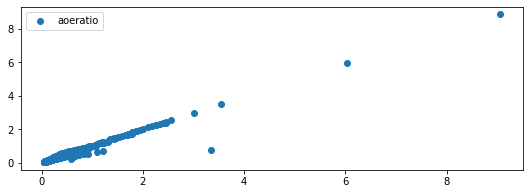

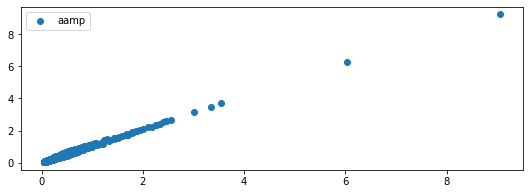

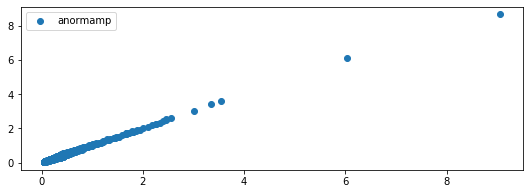

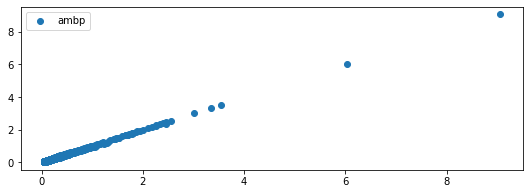

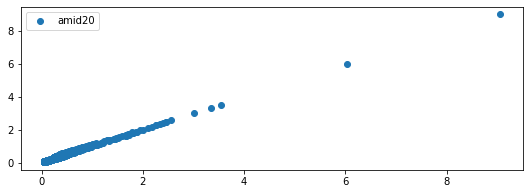

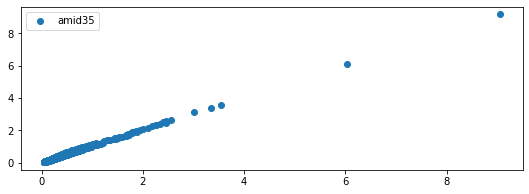

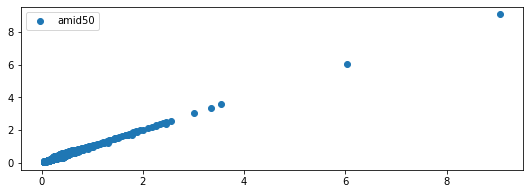

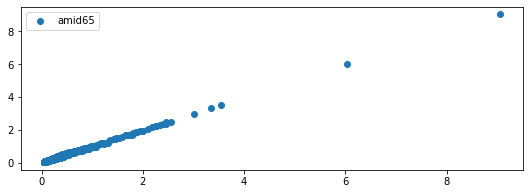

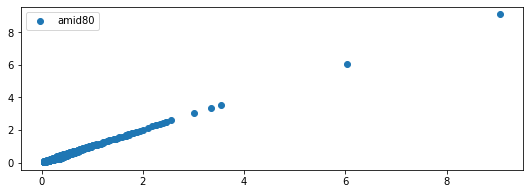

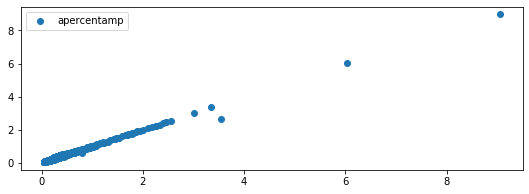

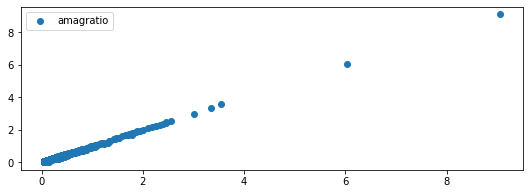

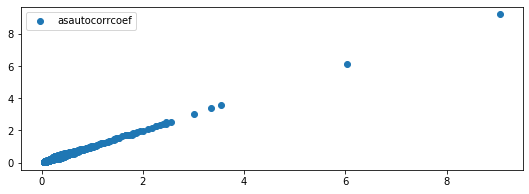

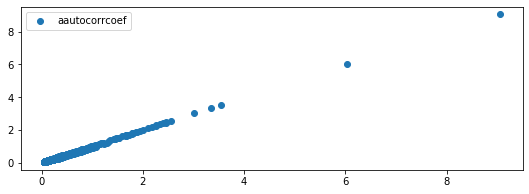

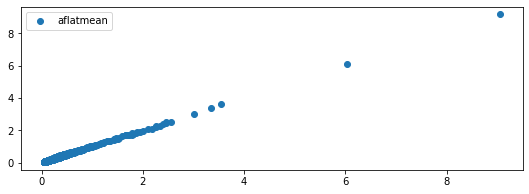

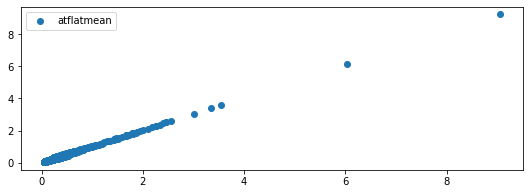

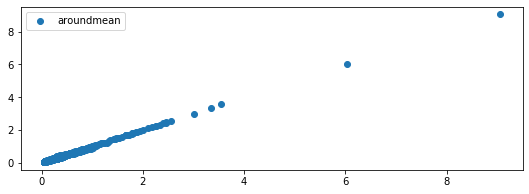

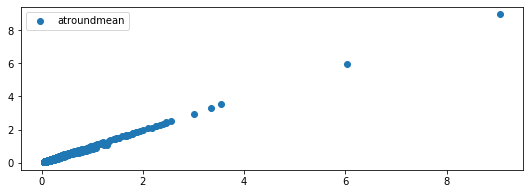

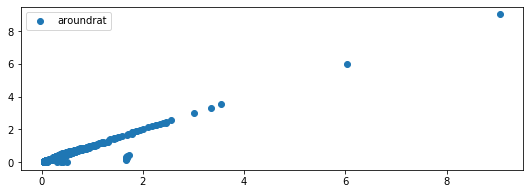

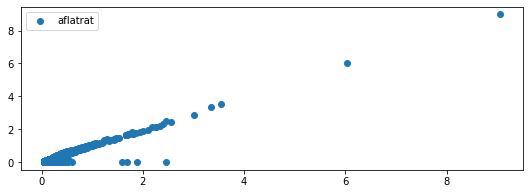

In [58]:
for i,col in enumerate(scoresdf.columns[:60]):
    fig = plt.figure(figsize=(9,3))
    ax = fig.add_subplot(111)
    ax.scatter(scoresbyfull['full'],scoresbyfull[col],label=col)
    ax.legend()
plt.show()

In [11]:
scores_diff = pd.DataFrame(index=scoresdf.index)
for col in scoresdf.columns:
    scores_diff[col] = scoresdf[col]-scoresdf['full']

In [12]:
scores_diff.describe()

,alongtermtrend,ameanmedrat,askews,avarss,acoeffvar,astds,anumoutliers,anumnegoutliers,anumposoutliers,anumout1s,...,full_0,full_1,full_2,full_3,full_4,full_5,full_6,full_7,full_8,full_9
count,156127.000000,156127.000000,156127.000000,156127.000000,156127.000000,156127.000000,156127.000000,156127.000000,156127.000000,156127.000000,...,156127.000000,156127.000000,156127.000000,156127.000000,156127.000000,156127.000000,156127.000000,156127.000000,156127.000000,156127.000000
mean,-0.000075,0.000073,0.000307,0.000689,0.000802,0.002107,0.000488,0.000537,-0.000146,0.000802,...,0.000717,0.000107,0.000068,0.001012,0.000618,0.000452,-0.000211,0.000733,0.000468,0.000470
std,0.004935,0.003020,0.002962,0.003993,0.003825,0.004971,0.003077,0.003381,0.003462,0.005699,...,0.004343,0.003472,0.003887,0.002562,0.002427,0.003081,0.003493,0.004140,0.002623,0.003508
min,-0.590293,-0.109747,-0.097886,-0.725954,-0.131911,-0.037883,-0.098049,-0.127774,-0.151688,-0.080600,...,-0.061362,-0.107756,-0.160526,-0.045085,-0.058072,-0.033177,-0.075072,-0.060052,-0.075933,-0.087477
25%,-0.000449,-0.000498,-0.000285,-0.000079,0.000103,0.000832,-0.000062,0.000083,-0.000807,0.000051,...,-0.000034,-0.000504,-0.000295,0.000331,0.000003,-0.000199,-0.000732,-0.000051,-0.000088,-0.000023
50%,0.000101,0.000037,0.000270,0.000455,0.000652,0.001470,0.000485,0.000644,-0.000228,0.000587,...,0.000499,0.000032,0.000246,0.000875,0.000550,0.000320,-0.000192,0.000482,0.000444,0.000527
75%,0.000636,0.000598,0.000811,0.001079,0.001333,0.002402,0.001059,0.001221,0.000387,0.001153,...,0.001049,0.000585,0.000781,0.001468,0.001146,0.000865,0.000344,0.001118,0.000992,0.001084
max,0.114618,0.092732,0.099847,0.113622,0.165636,0.686153,0.094804,0.077574,0.105684,0.211821,...,0.151694,0.100184,0.066548,0.127715,0.178946,0.090446,0.112409,0.273214,0.074743,0.085029


/Users/Dan/Documents/KeplerML/python/quarterTools.py:420: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(15,1))


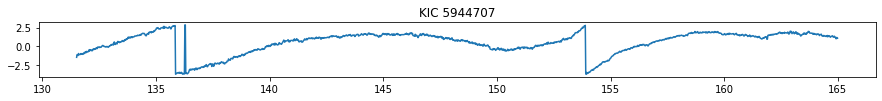

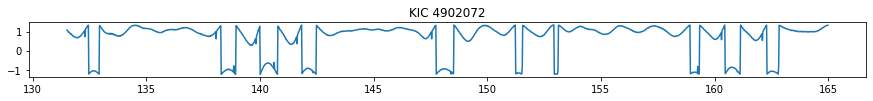

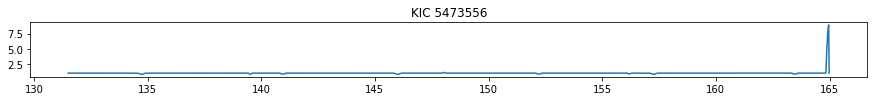

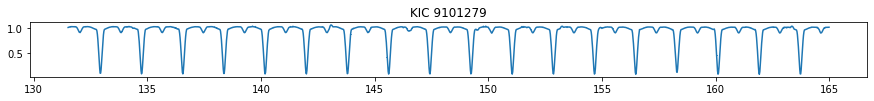

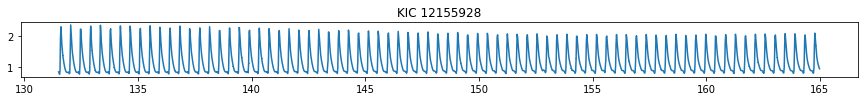

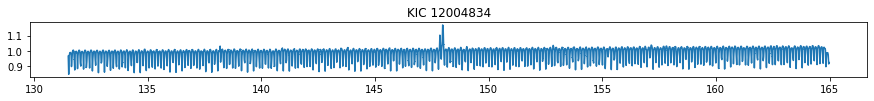

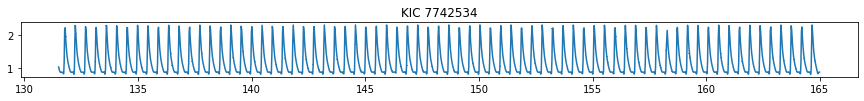

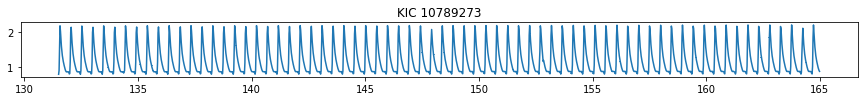

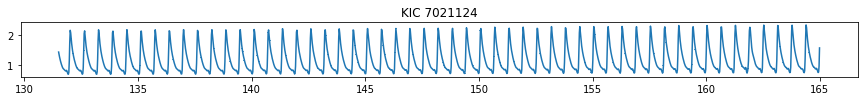

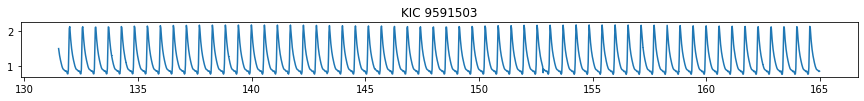

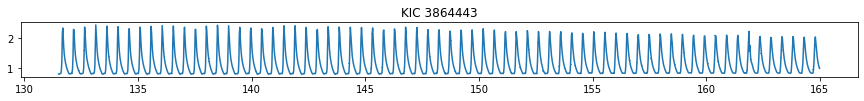

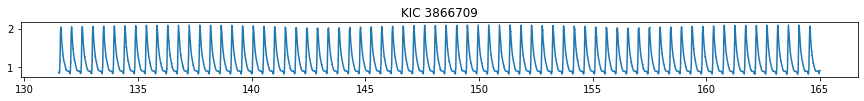

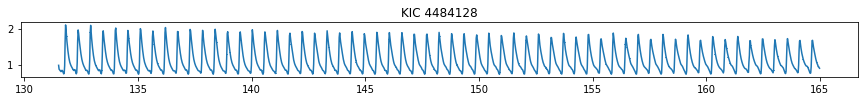

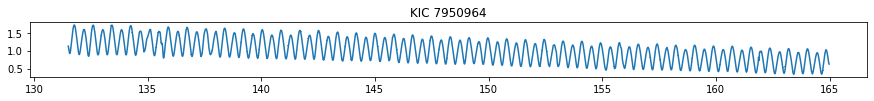

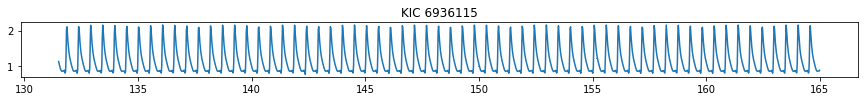

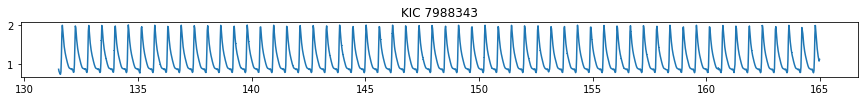

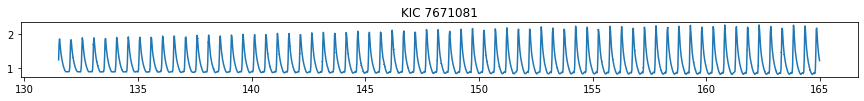

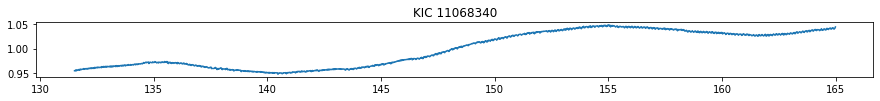

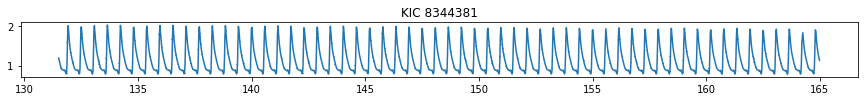

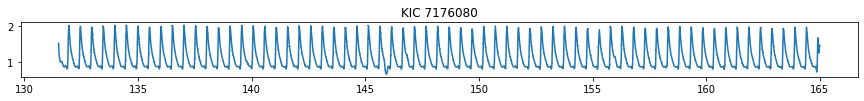

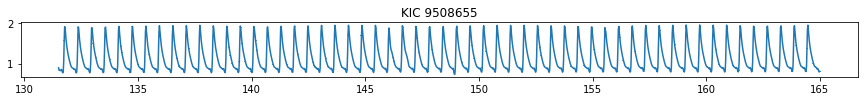

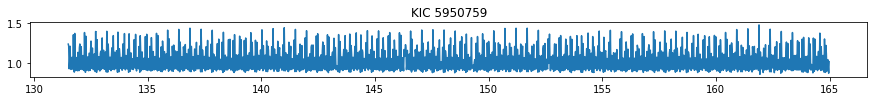

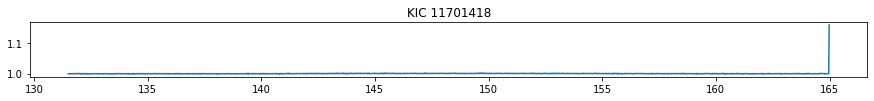

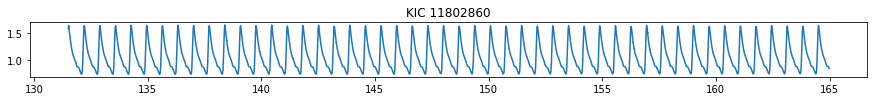

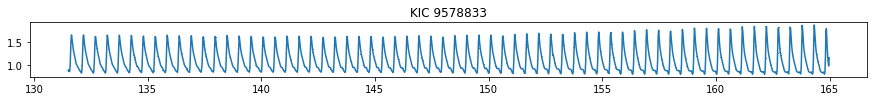

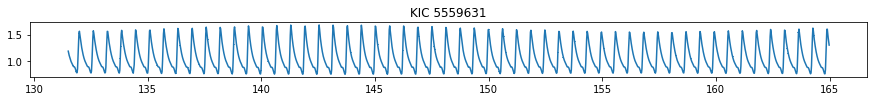

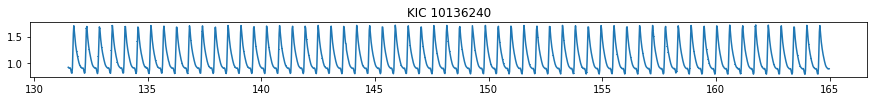

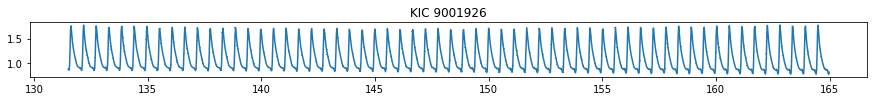

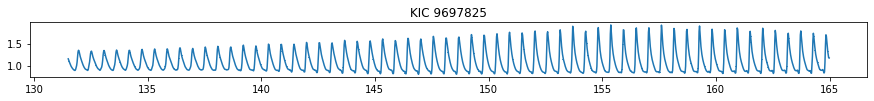

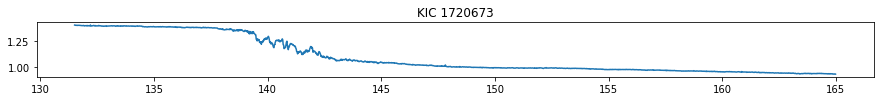

In [7]:
Q1_outlier_feats = qt.plot_top_n(Q_dict['Q1'],n=30,sortby='minus_rats',top_n_df=True)

In [8]:
tsne_sample = Q_dict[Q].scores.sort_values(by='minus_rats',ascending=False).head(2000).index

In [9]:
tsne_red = qt.tsne_fit(Q_dict[Q].data.loc[tsne_sample,fts_minus_rats])

[t-SNE] Computing 3001 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.033s...
[t-SNE] Computed neighbors for 10000 samples in 18.037s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 1.922268
[t-SNE] KL divergence after 250 iterations with early exaggeration: 50.466297
[t-SNE] KL divergence after 1000 iterations: 0.781475


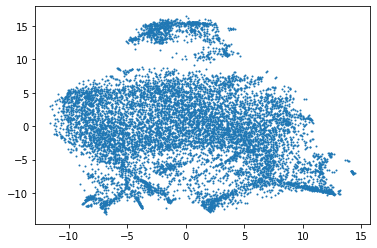

In [12]:
plt.scatter(tsne_red.iloc[:,0],tsne_red.iloc[:,1],s=1)

In [14]:
tsne_sample_df = Q_dict[Q].data.loc[tsne_sample,fts_minus_rats].copy()
tsne_sample_df['tsne_x'] = tsne_red.iloc[:,0]
tsne_sample_df['tsne_y'] = tsne_red.iloc[:,1]

In [18]:
out_cut = Q_dict['Q1'].scores.loc[tsne_sample_df.index].minus_rats>.1

In [21]:
test = {False:'black',True:'red'}
colors = [test[i] for i in out_cut]

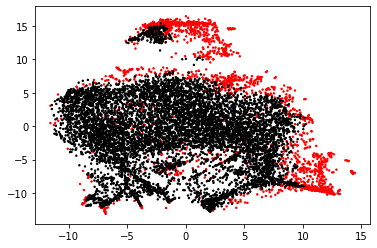

In [27]:
out_cut = Q_dict['Q1'].scores.loc[tsne_sample_df.index].minus_rats>.1
test = {False:0,True:-1}
db_out = [test[i] for i in out_cut]
plt.scatter(tsne_red.iloc[:,0],tsne_red.iloc[:,1],s=2,c=colors)

In [33]:
test = {False:0,True:-1}
outs = [test[i] for i in out_cut]
tsne_red['outs'] = outs

In [ ]:
interactive_plot(tsne_red,'','outs')

Plotting.
